<a href="https://colab.research.google.com/github/anthonymalumbe/anthonyml_portfolio/blob/main/Detection_of_COVID_19_through_Chest_Imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import subprocess
import tensorflow as tf

def downgrade_tensorflow(desired_version):
    try:
        current_version = tf.__version__
        if current_version == desired_version:
            print(f"TensorFlow is already at version {desired_version}. No downgrade needed.")
        else:
            # Uninstall the current TensorFlow version
            uninstall_command = f"pip uninstall tensorflow -y"
            subprocess.run(uninstall_command, shell=True, check=True)

            # Install the desired TensorFlow version
            install_command = f"pip install tensorflow=={desired_version}"
            subprocess.run(install_command, shell=True, check=True)

            print(f"Successfully downgraded TensorFlow to version {desired_version}")
    except Exception as e:
        print(f"Error: {e}")
#desired_version = "2.9.1"  # Replace with your desired TensorFlow version
#downgrade_tensorflow(desired_version)

!pip uninstall -q tensorflow
!pip install tensorflow==2.9.1
import tensorflow as tf


Proceed (Y/n)? Y
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 64.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting 

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from time import perf_counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

def printmd(string):
    # Print with Markdowns
    display(Markdown(string))



In [2]:
os.environ['KAGGLE_USERNAME'] = "anthonymalumbe"
os.environ['KAGGLE_KEY'] = "0cb4a0f3fe6d28695713571db2848621"

In [3]:
# defining Path

checkfileexists = '/covidqu.zip'

# Checking whether the specified path exists
isFile = os.path.isfile(checkfileexists)
if not isFile:
  !kaggle datasets download anasmohammedtahir/covidqu

100% 1.15G/1.15G [00:46<00:00, 36.1MB/s]
100% 1.15G/1.15G [00:46<00:00, 26.9MB/s]


In [4]:
def create_directories(paths):
    """
    Create directories if they do not exist.

    Parameters:
    - paths: A list of directory paths to be checked and created if they do not exist.

    This function takes a list of directory paths and checks whether each specified path exists.
    If a path does not exist, it creates a new directory at that location.

    Example usage:
    paths_to_create = ["dataset/covid", "dataset/normal", "dataset/non_covid"]
    create_directories(paths_to_create)
    """
    for path in paths:
        # Check whether the specified path exists
        is_exist = os.path.exists(path)
        if not is_exist:
            # Create a new directory because it does not exist
            os.makedirs(path)

In [5]:
    paths_to_create = ["dataset/train", "dataset/test", "dataset/val", "dataset/unknown"]
    create_directories(paths_to_create)

In [ ]:
#!unzip -n -q covidqu.zip  -d "COVID-QU-Ex Dataset/"

In [ ]:
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/Non-COVID/images/*' -d /content/dataset/non_covid
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/Non-COVID/images/*' -d /content/dataset/non_covid
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/images/*' -d /content/dataset/non_covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/Non-COVID/images/*' -d /content/dataset/non_covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/Non-COVID/images/*' -d /content/dataset/non_covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/images/*' -d /content/dataset/non_covid

In [6]:
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/*' -d /content/dataset/test
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/*' -d /content/dataset/test
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/Non-COVID/images/*' -d /content/dataset/test
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/COVID-19/images/*' -d /content/dataset/train
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/*' -d /content/dataset/train
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/Non-COVID/images/*' -d /content/dataset/train
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/*' -d /content/dataset/val
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/Normal/images/*' -d /content/dataset/val
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/images/*' -d /content/dataset/val
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/images/*' -d /content/dataset/test
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/Normal/images/*' -d /content/dataset/test
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/Non-COVID/images/*' -d /content/dataset/test
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/COVID-19/images/*' -d /content/dataset/train
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/Normal/images/*' -d /content/dataset/train
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/Non-COVID/images/*' -d /content/dataset/train
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/COVID-19/images/*' -d /content/dataset/val
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/Normal/images/*' -d /content/dataset/val
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/images/*' -d /content/dataset/val

In [17]:
# Create a list with the filepaths for training and testing
dir_ = Path('/content/dataset/train')
train_file_paths = list(dir_.glob(r'**/*.png'))

dir_ = Path('/content/dataset/test')
test_file_paths = list(dir_.glob(r'**/*.png'))

dir_ = Path('/content/dataset/val')
val_file_paths = list(dir_.glob(r'**/*.png'))

In [32]:
import pandas as pd
import re


from pathlib import Path

def extract_labels_from_filename(filepath):
    """Create a DataFrame with filepaths and labels extracted from filenames.

    This function takes a list of filepaths and extracts labels from the filenames
    if they contain "covid," "non_covid," or "normal." It creates a DataFrame with
    two columns: 'Filepath' and 'Label', where 'Filepath' contains the file paths
    of the images and 'Label' contains the extracted labels.

    Args:
        filepath (list): A list of filepaths.

    Returns:
        pd.DataFrame: A DataFrame with 'Filepath' and 'Label' columns.
    """

    # Extract labels from filenames that contain "covid," "non_covid," or "normal" (case-insensitive)
    labels = []
    for filename in filepath:
      label = Path(filename).name
      if "covid" in label:
          labels.append("covid")
      elif "COVID" in label:
          labels.append("non_covid")
      elif "Normal" in label:
          labels.append("normal")


    # Create Series for filepaths and labels
    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels into a DataFrame
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset the index
    df = df.sample(frac=1, random_state=0).reset_index(drop=True)

    return df

train_df = extract_labels_from_filename(train_file_paths)
val_df = extract_labels_from_filename(val_file_paths)
# Combine train_df and val_df
train_df = pd.concat([train_df,val_df]).reset_index(drop = True)
test_df = extract_labels_from_filename(test_file_paths)

# Print information about the dataset
print(f'Number of pictures in the training set: {train_df.shape[0]}')
print(f'Number of pictures in the test set: {test_df.shape[0]}')
print(f'Number of pictures in the validation set: {val_df.shape[0]}\n')

print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)


Number of pictures in the training set: 20669
Number of pictures in the test set: 5173
Number of pictures in the validation set: 4138

Number of different labels: 3

Labels: ['covid' 'non_covid' 'normal']


,Filepath,Label
0,/content/dataset/train/covid_2460.png,covid
1,/content/dataset/train/non_COVID (6710).png,non_covid
2,/content/dataset/train/non_COVID (7290).png,non_covid
3,/content/dataset/train/non_COVID (479).png,non_covid
4,/content/dataset/train/Normal (10343).png,normal


In [33]:
import os
import shutil
import sys

# Define the source folders
source_folders = ["dataset/train", "dataset/test", "dataset/val"]

# Define the target folder for unknown files
target_folder = "dataset/unknown"

# Define the allowed file name patterns
allowed_patterns = ["covid", "normal", "non_covid"]

# Create the target directory if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

stdout_orig = sys.stdout
sys.stdout = open(os.devnull, 'w')

# Iterate through the source folders
for source_folder in source_folders:
    # List files in the source folder
    files = os.listdir(source_folder)

    # Iterate through the files in the source folder
    for file in files:
        # Check if the file name doesn't match any of the allowed patterns
        if all(pattern not in file.lower() for pattern in allowed_patterns):
            # Construct the source file path and target file path
            source_path = os.path.join(source_folder, file)
            target_path = os.path.join(target_folder, file)

            # Move the file to the "dataset/unknown" folder
            shutil.move(source_path, target_path)
            print(f"Moved {file} to {target_folder}")

# Restore stdout
sys.stdout.close()
sys.stdout = stdout_orig

print("File moving complete.")

File moving complete.


In [34]:
# Create a list with the filepaths for training and testing
dir_ = Path('/content/dataset/train')
train_file_paths = list(dir_.glob(r'**/*.png'))

dir_ = Path('/content/dataset/test')
test_file_paths = list(dir_.glob(r'**/*.png'))

dir_ = Path('/content/dataset/val')
val_file_paths = list(dir_.glob(r'**/*.png'))

In [35]:
train_df = extract_labels_from_filename(train_file_paths)
val_df = extract_labels_from_filename(val_file_paths)
# Combine train_df and val_df
train_df = pd.concat([train_df,val_df]).reset_index(drop = True)
test_df = extract_labels_from_filename(test_file_paths)

# Print information about the dataset
print(f'Number of pictures in the training set: {train_df.shape[0]}')
print(f'Number of pictures in the test set: {test_df.shape[0]}')
print(f'Number of pictures in the validation set: {val_df.shape[0]}\n')

print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)

Number of pictures in the training set: 20669
Number of pictures in the test set: 5173
Number of pictures in the validation set: 4138

Number of different labels: 3

Labels: ['covid' 'non_covid' 'normal']


,Filepath,Label
0,/content/dataset/train/covid_2460.png,covid
1,/content/dataset/train/non_COVID (6710).png,non_covid
2,/content/dataset/train/non_COVID (7290).png,non_covid
3,/content/dataset/train/non_COVID (479).png,non_covid
4,/content/dataset/train/Normal (10343).png,normal


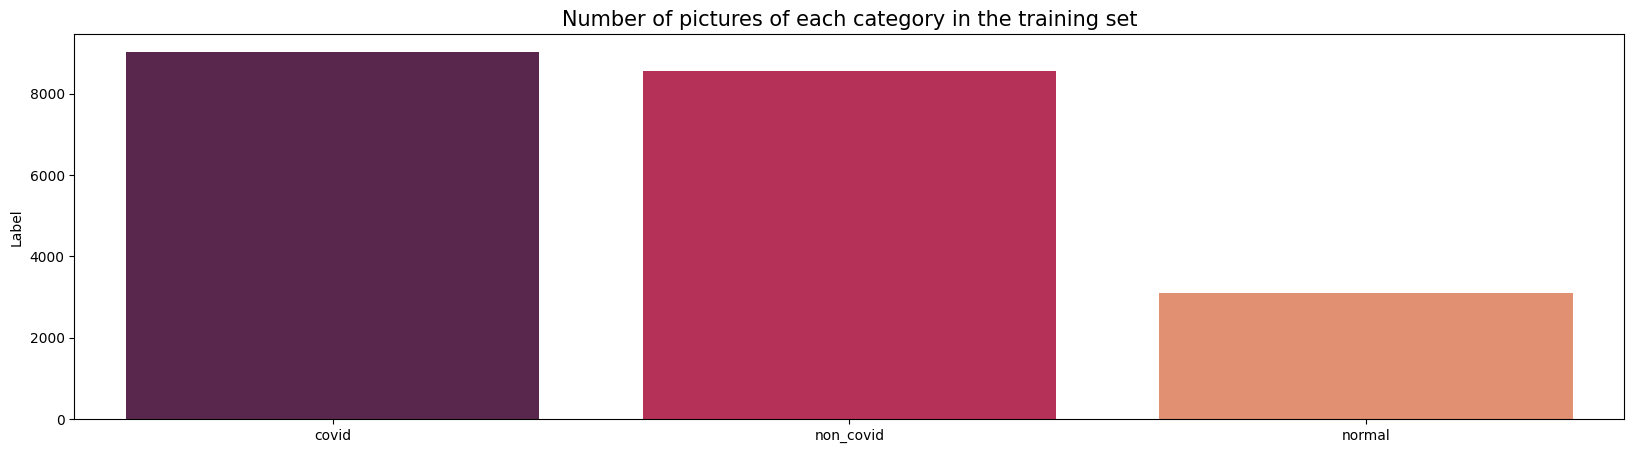

In [36]:
# Display the number of pictures of each category in the training set
vc = train_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = sorted(vc.index), y = vc, palette = "rocket")
plt.title("Number of pictures of each category in the training set", fontsize = 15)
plt.show()

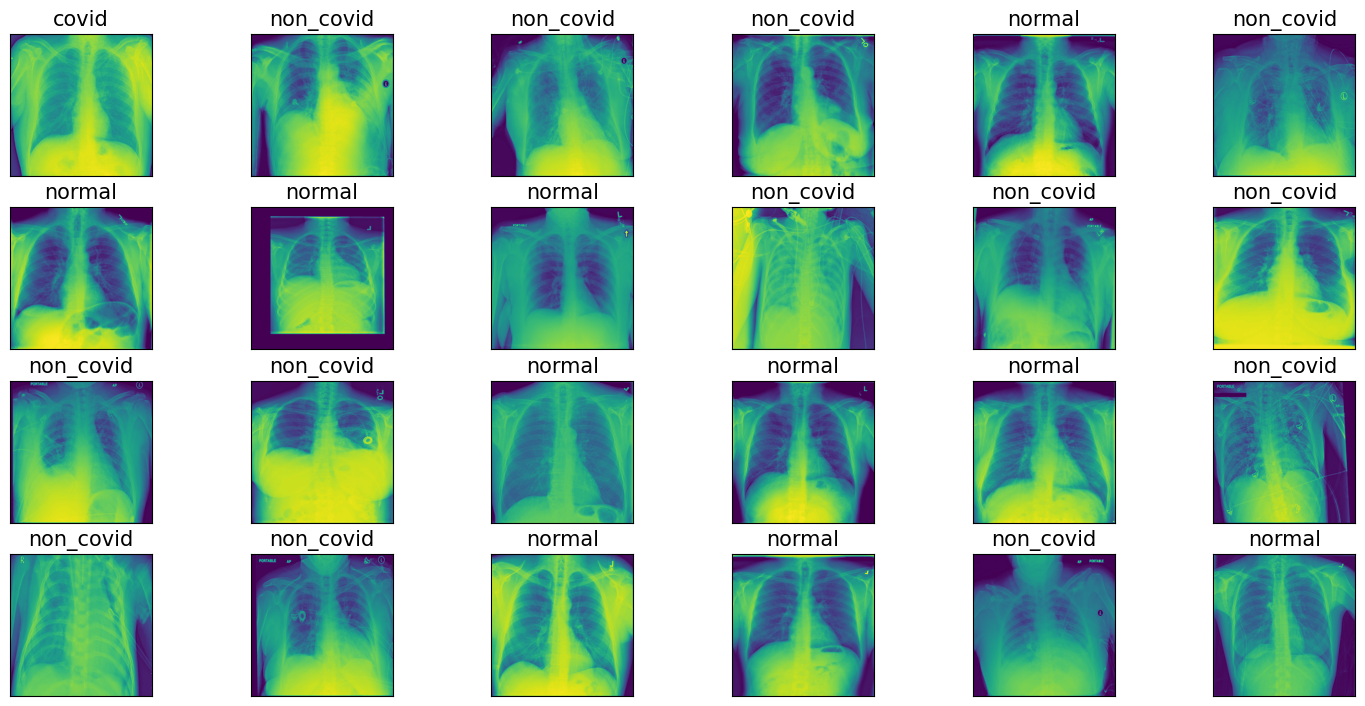

In [37]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.Filepath[i]))
    ax.set_title(train_df.Label[i], fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

In [38]:
def create_gen():
    # Load the Images with a generator and Data Augmentation
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='grayscale', #'rgb'
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='training',
#         rotation_range=30, # Uncomment to use data augmentation
#         zoom_range=0.15,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.15,
#         horizontal_flip=True,
#         fill_mode="nearest"
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='grayscale', #'rgb'
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
#         rotation_range=30, # Uncomment to use data augmentation on the validation set
#         zoom_range=0.15,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.15,
#         horizontal_flip=True,
#         fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='grayscale', #'rgb'
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    return train_generator,test_generator,train_images,val_images,test_images

In [40]:
def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='Adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [41]:
# Dictionary with the models
models = {
    "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "DenseNet169": {"model":tf.keras.applications.DenseNet169, "perf":0},
    "DenseNet201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "EfficientNetB0": {"model":tf.keras.applications.EfficientNetB0, "perf":0},
    "EfficientNetB1": {"model":tf.keras.applications.EfficientNetB1, "perf":0},
    "EfficientNetB2": {"model":tf.keras.applications.EfficientNetB2, "perf":0},
    "EfficientNetB3": {"model":tf.keras.applications.EfficientNetB3, "perf":0},
    "EfficientNetB4": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "EfficientNetB5": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "EfficientNetB6": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "EfficientNetB7": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "InceptionResNetV2": {"model":tf.keras.applications.InceptionResNetV2, "perf":0},
    "InceptionV3": {"model":tf.keras.applications.InceptionV3, "perf":0},
    "MobileNet": {"model":tf.keras.applications.MobileNet, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "MobileNetV3Large": {"model":tf.keras.applications.MobileNetV3Large, "perf":0},
    "MobileNetV3Small": {"model":tf.keras.applications.MobileNetV3Small, "perf":0},
    "NASNetMobile": {"model":tf.keras.applications.NASNetMobile, "perf":0},
    "ResNet101": {"model":tf.keras.applications.ResNet101, "perf":0},
    "ResNet101V2": {"model":tf.keras.applications.ResNet101V2, "perf":0},
    "ResNet152": {"model":tf.keras.applications.ResNet152, "perf":0},
    "ResNet152V2": {"model":tf.keras.applications.ResNet152V2, "perf":0},
    "ResNet50": {"model":tf.keras.applications.ResNet50, "perf":0},
    "ResNet50V2": {"model":tf.keras.applications.ResNet50V2, "perf":0},
    "VGG16": {"model":tf.keras.applications.VGG16, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
    "Xception": {"model":tf.keras.applications.Xception, "perf":0}
}

# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

# Fit the models
for name, model in models.items():

    # Get the model
    m = get_model(model['model'])
    models[name]['model'] = m

    start = perf_counter()

    # Fit the model
    history = m.fit(train_images,validation_data=val_images,epochs=1,verbose=0)

    # Sav the duration and the val_accuracy
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

Found 18603 validated image filenames belonging to 3 classes.
Found 2066 validated image filenames belonging to 3 classes.
Found 5173 validated image filenames belonging to 3 classes.


29084464/29084464 [==============================] - 1s 0us/step


InvalidArgumentError: ignored

In [43]:
# Import necessary libraries
import tensorflow as tf
from time import perf_counter
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the number of classes
num_classes = 3  # Set the number of classes to 3

# Dictionary with the models
models = {
    "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "DenseNet169": {"model":tf.keras.applications.DenseNet169, "perf":0},
    "DenseNet201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "EfficientNetB0": {"model":tf.keras.applications.EfficientNetB0, "perf":0},
    "EfficientNetB1": {"model":tf.keras.applications.EfficientNetB1, "perf":0},
    "EfficientNetB2": {"model":tf.keras.applications.EfficientNetB2, "perf":0},
    "EfficientNetB3": {"model":tf.keras.applications.EfficientNetB3, "perf":0},
    "EfficientNetB4": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "EfficientNetB5": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "EfficientNetB6": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "EfficientNetB7": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "InceptionResNetV2": {"model":tf.keras.applications.InceptionResNetV2, "perf":0},
    "InceptionV3": {"model":tf.keras.applications.InceptionV3, "perf":0},
    "MobileNet": {"model":tf.keras.applications.MobileNet, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "MobileNetV3Large": {"model":tf.keras.applications.MobileNetV3Large, "perf":0},
    "MobileNetV3Small": {"model":tf.keras.applications.MobileNetV3Small, "perf":0},
    "NASNetMobile": {"model":tf.keras.applications.NASNetMobile, "perf":0},
    "ResNet101": {"model":tf.keras.applications.ResNet101, "perf":0},
    "ResNet101V2": {"model":tf.keras.applications.ResNet101V2, "perf":0},
    "ResNet152": {"model":tf.keras.applications.ResNet152, "perf":0},
    "ResNet152V2": {"model":tf.keras.applications.ResNet152V2, "perf":0},
    "ResNet50": {"model":tf.keras.applications.ResNet50, "perf":0},
    "ResNet50V2": {"model":tf.keras.applications.ResNet50V2, "perf":0},
    "VGG16": {"model":tf.keras.applications.VGG16, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
    "Xception": {"model":tf.keras.applications.Xception, "perf":0}
}

# Function to create a model
def create_model(base_model):
    # Create the base model with pre-trained weights
    base = base_model(weights='imagenet', include_top=False)

    # Add a global average pooling layer
    x = GlobalAveragePooling2D()(base.output)

    # Add a dense output layer with 3 neurons for 3 classes
    output = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=base.input, outputs=output)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the generators
train_generator, test_generator, train_images, val_images, test_images = create_gen()
print('\n')

# Fit the models
for name, model in models.items():

    # Get the model
    m = create_model(model['model'])
    models[name]['model'] = m

    start = perf_counter()

    # Fit the model
    history = m.fit(train_images, validation_data=val_images, epochs=1, verbose=0)

    # Save the duration and the val_accuracy
    duration = perf_counter() - start
    duration = round(duration, 2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v, 4) for v in val_acc]


Found 18603 validated image filenames belonging to 3 classes.
Found 2066 validated image filenames belonging to 3 classes.
Found 5173 validated image filenames belonging to 3 classes.




/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DenseNet121          trained in 91.42 sec
9406464/9406464 [==============================] - 1s 0us/step
MobileNetV2          trained in 75.79 sec
51877672/51877672 [==============================] - 2s 0us/step
DenseNet169          trained in 112.48 sec
74836368/74836368 [==============================] - 3s 0us/step
DenseNet201          trained in 138.07 sec
16705208/16705208 [==============================] - 1s 0us/step
EfficientNetB0       trained in 100.35 sec
27018416/27018416 [==============================] - 1s 0us/step
EfficientNetB1       trained in 140.98 sec
31790344/31790344 [==============================] - 1s 0us/step
EfficientNetB2       trained in 146.82 sec
43941136/43941136 [==============================] - 2s 0us/step
EfficientNetB3       trained in 172.43 sec
71686520/71686520 [==============================] - 3s 0us/step
EfficientNetB4       trained in 211.89 sec
EfficientNetB5       trained in 210.53 sec
EfficientNetB6       trained in 210.4 sec
EfficientNet

InceptionV3          trained in 65.58 sec
17225924/17225924 [==============================] - 1s 0us/step


MobileNet            trained in 67.6 sec
12683000/12683000 [==============================] - 1s 0us/step


MobileNetV3Large     trained in 69.08 sec
4334752/4334752 [==============================] - 1s 0us/step
MobileNetV3Small     trained in 53.15 sec
19993432/19993432 [==============================] - 1s 0us/step
NASNetMobile         trained in 168.25 sec
171446536/171446536 [==============================] - 6s 0us/step
ResNet101            trained in 121.55 sec
171317808/171317808 [==============================] - 6s 0us/step
ResNet101V2          trained in 112.96 sec
234698864/234698864 [==============================] - 29s 0us/step
ResNet152            trained in 171.44 sec
234545216/234545216 [==============================] - 8s 0us/step
ResNet152V2          trained in 161.63 sec
94765736/94765736 [==============================] - 3s 0us/step
ResNet50             trained in 73.2 sec
94668760/94668760 [==============================] - 3s 0us/step
ResNet50V2           trained in 68.0 sec
58889256/58889256 [==============================] - 2s 0us/step
VGG16                traine

In [44]:
for name, model in models.items():

    # Predict the label of the test_images
    pred = models[name]['model'].predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    y_test = list(test_df.Label)
    acc = accuracy_score(y_test,pred)
    models[name]['acc'] = round(acc,4)

162/162 [==============================] - 13s 77ms/step


In [45]:
from sklearn.metrics import accuracy_score

# Create a dictionary to store model accuracies
model_accuracies = {}

# Iterate through the models
for name, model_info in models.items():

    # Get the model
    model = model_info['model']

    # Predict the label of the test_images
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Map the labels
    class_indices = train_images.class_indices
    label_mapping = {v: k for k, v in class_indices.items()}
    predicted_labels = [label_mapping[label_idx] for label_idx in predicted_labels]

    # Get the true labels from the test dataset
    true_labels = list(test_df.Label)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Store accuracy in the dictionary
    model_info['acc'] = round(accuracy, 4)

    # Store accuracy in the separate dictionary
    model_accuracies[name] = round(accuracy, 4)

# Print the model accuracies
for name, accuracy in model_accuracies.items():
    print(f"{name}: Accuracy = {accuracy}")


 30/162 [====>.........................] - ETA: 10s

KeyboardInterrupt: ignored

In [46]:
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['val_acc'][-1],
                          models[name]['acc'],
                          models[name]['perf']])

df_results = pd.DataFrame(models_result,
                          columns = ['model','val_accuracy','accuracy (test set)','Training time (sec)'])
df_results.sort_values(by='accuracy (test set)', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

,model,val_accuracy,accuracy (test set),Training time (sec)
0,DenseNet201,0.9071,0.9490,138.07
1,Xception,0.8998,0.9437,156.04
2,ResNet101V2,0.8916,0.9416,112.96
3,ResNet50V2,0.9061,0.9412,68.00
4,ResNet152V2,0.8921,0.9320,161.63
5,MobileNet,0.8833,0.9306,67.60
6,InceptionResNetV2,0.8819,0.9234,149.75
7,DenseNet169,0.8742,0.9211,112.48
8,VGG16,0.8524,0.8972,84.16
9,VGG19,0.8107,0.8751,94.63


In [ ]:
import pandas as pd

# Create a list to store the results
models_result = []

# Iterate through the models and retrieve their performance metrics
for name, model_info in models.items():
    model_name = name
    val_accuracy = model_info['val_acc'][-1]
    test_accuracy = model_info['acc']
    training_time = model_info['perf']

    # Append the results to the list
    models_result.append([model_name, val_accuracy, test_accuracy, training_time])

# Create a DataFrame from the results list
df_results = pd.DataFrame(models_result, columns=['Model', 'Validation Accuracy', 'Test Accuracy', 'Training Time (sec)'])

# Sort the DataFrame by 'Test Accuracy' in descending order
df_results.sort_values(by='Test Accuracy', ascending=False, inplace=True)

# Reset the index of the DataFrame
df_results.reset_index(inplace=True, drop=True)

# Print the results
print(df_results)


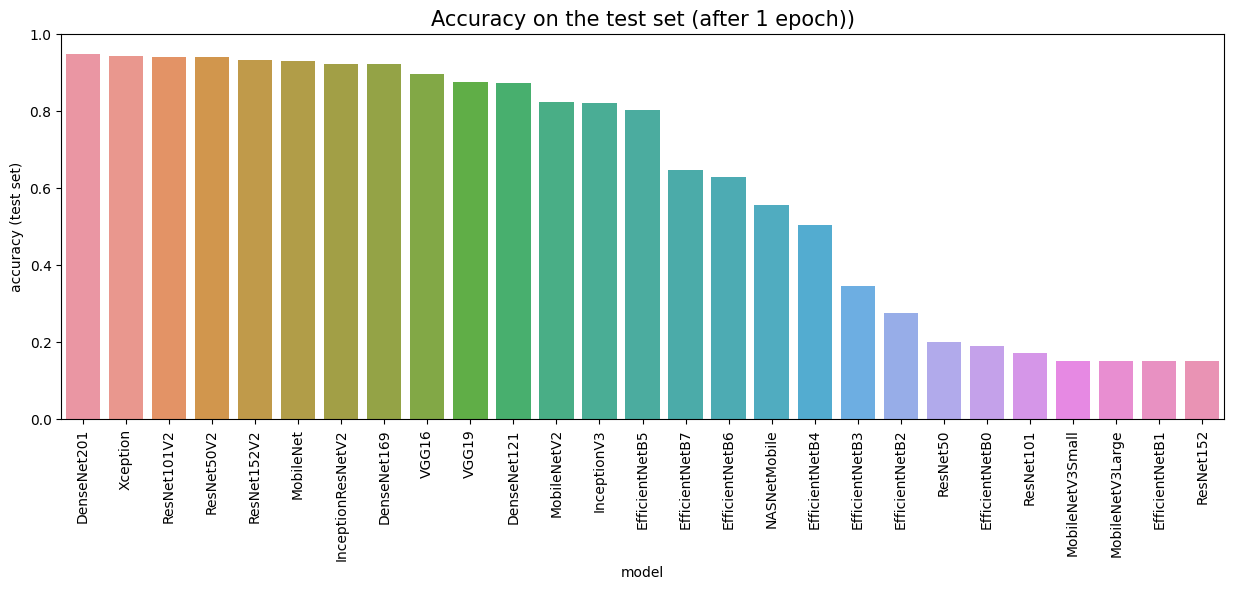

In [49]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'accuracy (test set)', data = df_results)
plt.title('Accuracy on the test set (after 1 epoch))', fontsize = 15)
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 5))

# Create a barplot to visualize test set accuracy for each model
sns.barplot(x='model', y='Test Accuracy', data=df_results)

# Set the plot title and adjust fontsize
plt.title('Test Set Accuracy (After 1 Epoch)', fontsize=15)

# Set the y-axis limit to ensure accuracy values are within the plot's range
plt.ylim(0, 1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


ValueError: ignored

<Figure size 1500x500 with 0 Axes>

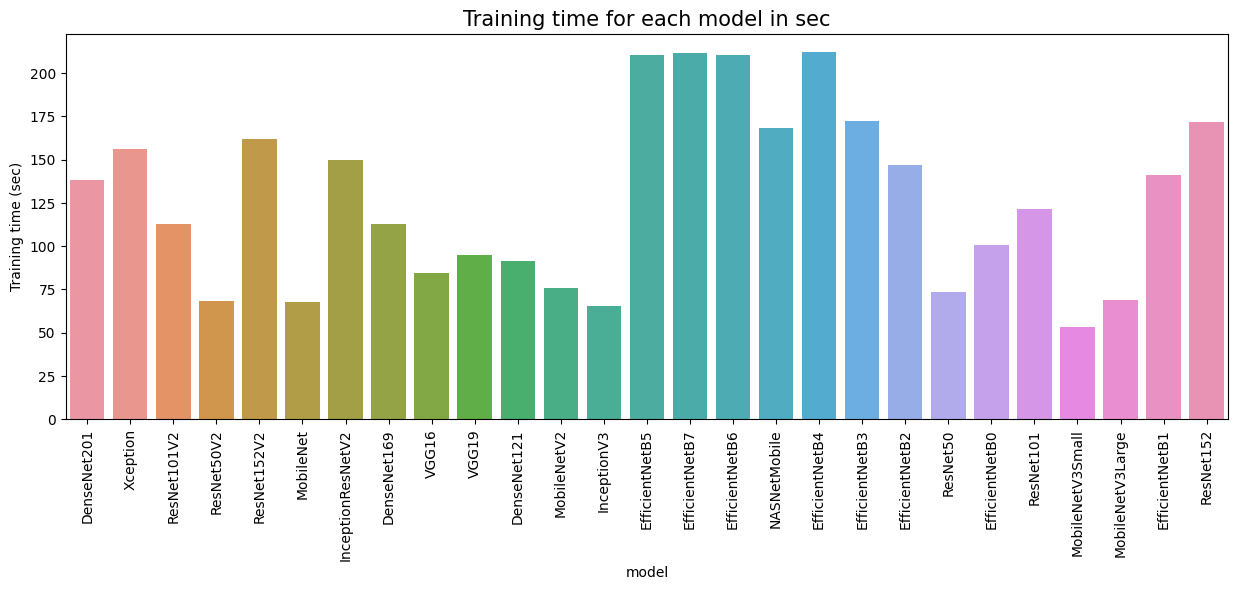

In [51]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'Training time (sec)', data = df_results)
plt.title('Training time for each model in sec', fontsize = 15)
plt.xticks(rotation=90)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 5))

# Create a barplot to visualize training time for each model
sns.barplot(x='Model', y='Training Time (sec)', data=df_results)

# Set the plot title and adjust fontsize
plt.title('Training Time for Each Model (in seconds)', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [52]:
import plotly.express as px

# Create a bar chart to visualize training time for each model
fig = px.bar(df_results, x='model', y='Training time (sec)')

# Customize the layout of the plot
fig.update_layout(
    title='Training Time for Each Model (in seconds)',
    xaxis_title='Model',
    yaxis_title='Training Time (sec)',
    xaxis_tickangle=-90,  # Rotate x-axis labels for better readability
    width=900,            # Set the width of the plot
    height=400            # Set the height of the plot
)

# Show the interactive plot
fig.show()

In [53]:
df_results

,model,val_accuracy,accuracy (test set),Training time (sec)
0,DenseNet201,0.9071,0.9490,138.07
1,Xception,0.8998,0.9437,156.04
2,ResNet101V2,0.8916,0.9416,112.96
3,ResNet50V2,0.9061,0.9412,68.00
4,ResNet152V2,0.8921,0.9320,161.63
5,MobileNet,0.8833,0.9306,67.60
6,InceptionResNetV2,0.8819,0.9234,149.75
7,DenseNet169,0.8742,0.9211,112.48
8,VGG16,0.8524,0.8972,84.16
9,VGG19,0.8107,0.8751,94.63


In [54]:
acc = df_results.iloc[0]['accuracy (test set)']
best_model = df_results.iloc[0]['model']
printmd(f'# Best model: {best_model}')
printmd(f'# Accuracy on the test set: {acc * 100:.2f}%')

# Best model: DenseNet201

# Accuracy on the test set: 94.90%

In [56]:
# Predict the labels of the test_images for the best model
pred = models[best_model]['model'].predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
models[name]['acc'] = round(acc,4)

162/162 [==============================] - 13s 83ms/step


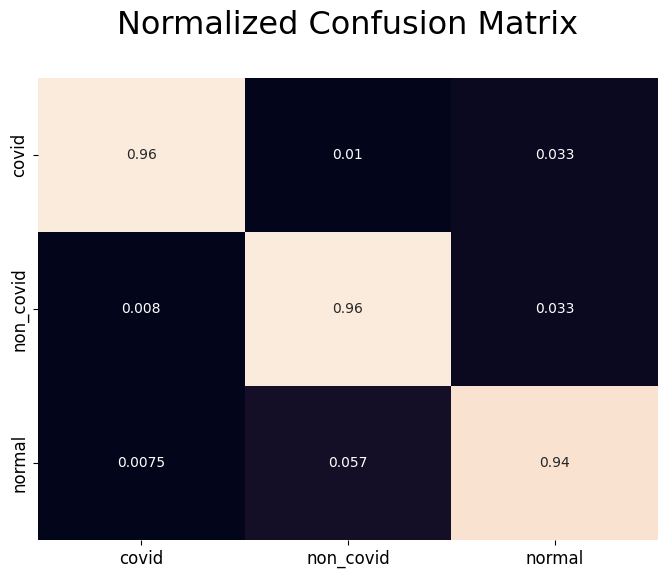

In [57]:
# Display a confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (8,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix\n', fontsize = 23)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       covid       0.96      0.96      0.96       780
   non_covid       0.94      0.96      0.95      2253
      normal       0.95      0.94      0.94      2140

    accuracy                           0.95      5173
   macro avg       0.95      0.95      0.95      5173
weighted avg       0.95      0.95      0.95      5173



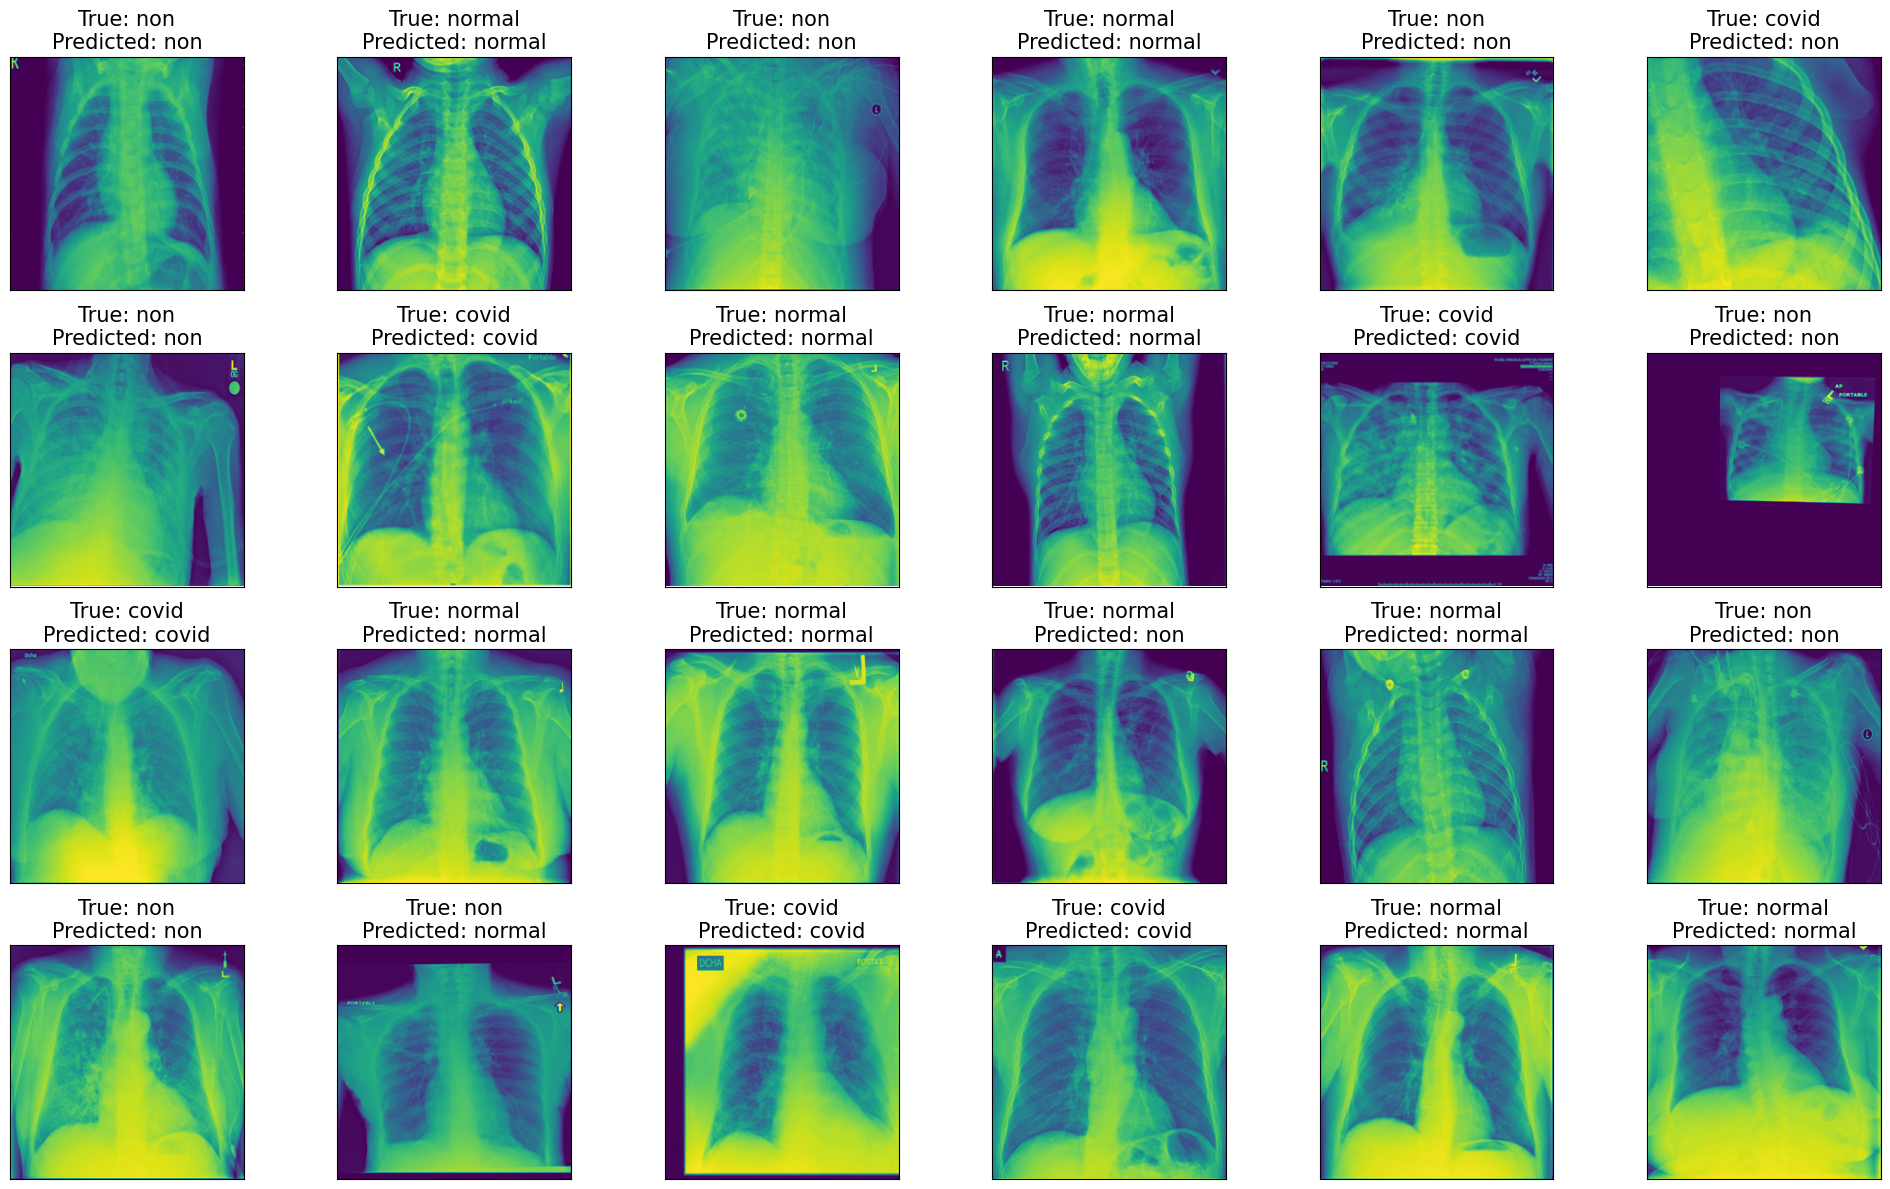

In [59]:
# Display picture of the dataset with their labels
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}", fontsize = 15)
plt.tight_layout()
plt.show()